In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Paths to the training and testing datasets
train_dir = 'E:/4TH YEAR/CAPSTONE/ORGANISED DATASET/train'
test_dir = 'E:/4TH YEAR/CAPSTONE/ORGANISED DATASET/test'

In [3]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Creating data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 6186 images belonging to 2 classes.
Found 1723 images belonging to 2 classes.


In [4]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\KMS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
from tensorflow.keras.optimizers import Adam

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator  # Using test data as validation
)


Epoch 1/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.7843 - loss: 0.5078 - val_accuracy: 0.8044 - val_loss: 0.4550
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.8088 - loss: 0.4756 - val_accuracy: 0.8433 - val_loss: 0.3943
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.8206 - loss: 0.4476 - val_accuracy: 0.8259 - val_loss: 0.4303
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 464s 2s/step - accuracy: 0.8363 - loss: 0.4332 - val_accuracy: 0.8491 - val_loss: 0.3894
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.8531 - loss: 0.4043 - val_accuracy: 0.8543 - val_loss: 0.3751
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.8462 - loss: 0.4101 - val_accuracy: 0.8532 - val_loss: 0.3914
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.8535 - loss: 0.4043 - val_accuracy: 0.8537 - val_loss: 0.3679
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.8571 - loss: 0.3942 - val_accu

In [17]:
# Save the model
model.save('C:\\Users\\KMS\\Documents\\PROJECT\\cnn_model.h5')

In [9]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8714 - loss: 0.3622
Test accuracy: 85.72%



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


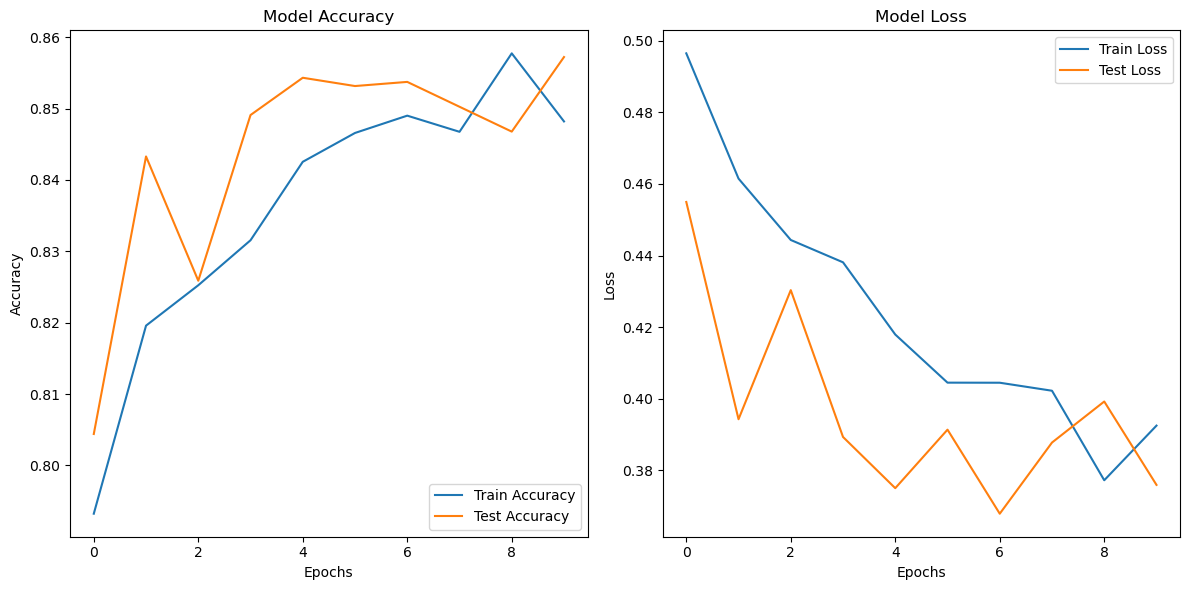

In [11]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plotting the accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')  # Use 'val_accuracy' for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  # Use 'val_loss' for validation loss
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [15]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r'E:\4TH YEAR\CAPSTONE\ORGANISED DATASET\test\benign\phyllodes_tumor\SOB_B_PT_14-21998AB\40X\SOB_B_PT-14-21998AB-40-013.png'  # Replace with the actual image path

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)  # Convert the image to a NumPy array

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Check the prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Malignant")
else:
    print("The model predicts: Benign")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
The model predicts: Benign


In [16]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img_path = r'E:\4TH YEAR\CAPSTONE\ORGANISED DATASET\test\malignant\lobular_carcinoma\SOB_M_LC_14-13412\100X\SOB_M_LC-14-13412-100-001.png'  # Replace with the actual image path

# Load the image and resize to 224x224
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)  # Convert the image to a NumPy array

# Normalize the image data
img_array = img_array / 255.0

# Expand dimensions to create a batch of one (the model expects a batch)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
prediction = model.predict(img_array)

# Check the prediction
if prediction[0][0] > 0.5:
    print("The model predicts: Malignant")
else:
    print("The model predicts: Benign")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The model predicts: Malignant
